# Ayudantía 3 - Procesamiento morfológico


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Filtros morfológicos

## Recordatorio: Segmentación por color usando HSV

Reutilizaremos la segmención de manzanas visto en el Tutorial 3.

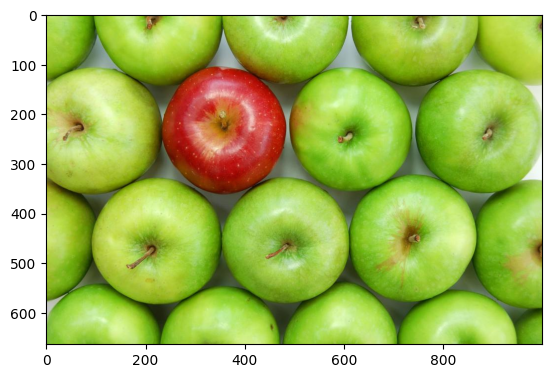

In [2]:
apples_rgb = cv2.imread('manzanas.jpeg', cv2.IMREAD_COLOR)[:, :, ::-1] 
plt.imshow(apples_rgb)

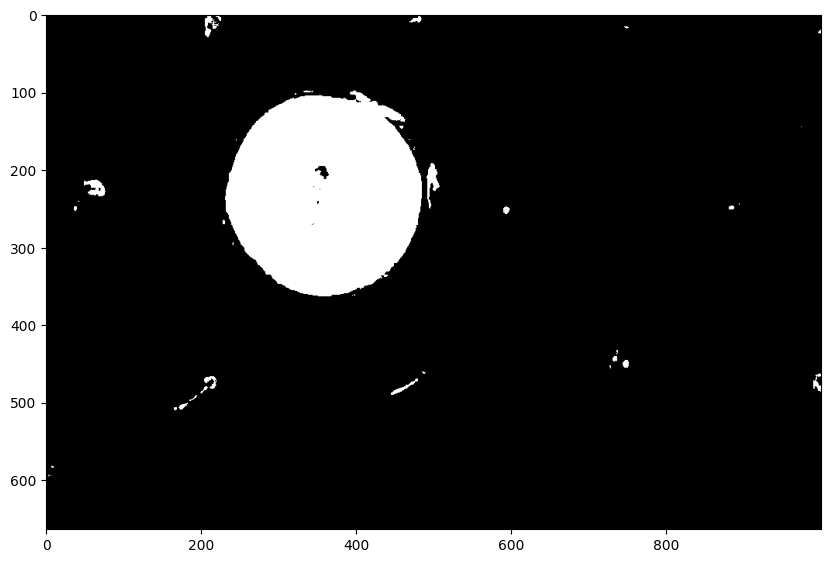

In [3]:
apples_hsv = cv2.cvtColor(apples_rgb, cv2.COLOR_RGB2HSV)

bin_mask = (apples_hsv[:, :, 0] < 20) | (apples_hsv[:, :, 0] > 160)
plt.figure(figsize=(10,10))
plt.imshow(bin_mask, cmap='gray')

## Apertura

In [4]:
kernel_size = (11,11)

# Usar OpenCV para crear un kernel
# cv2.MORPH_RECT -> Rectangulo
# cv2.MORPH_CROSS -> Cruz 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

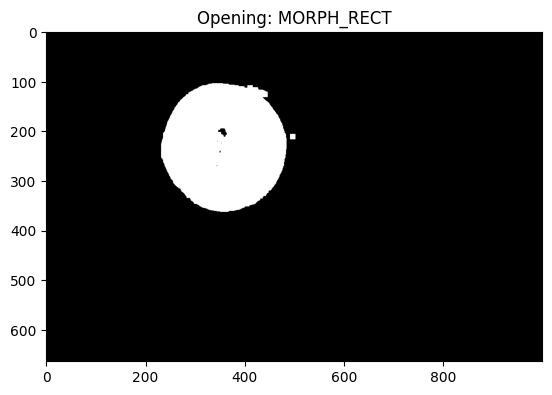

In [5]:
opening = cv2.morphologyEx(bin_mask*1., cv2.MORPH_OPEN, kernel)

plt.title(f"Opening: MORPH_RECT")
plt.imshow(opening, cmap='gray')
plt.show()

In [6]:
kernel_size = (11,11)

# Usar OpenCV para crear un kernel
# cv2.MORPH_RECT -> Rectangulo
# cv2.MORPH_CROSS -> Cruz 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)
kernel

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

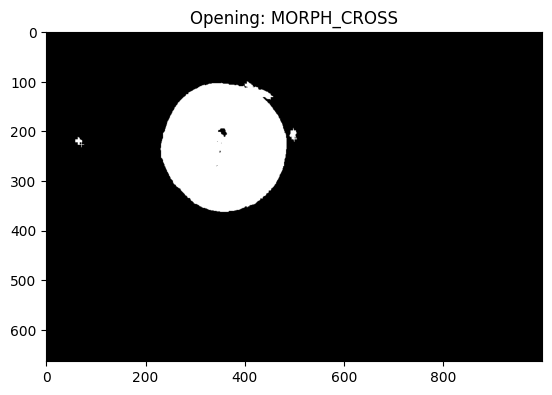

In [7]:
opening = cv2.morphologyEx(bin_mask*1., cv2.MORPH_OPEN, kernel)

plt.title(f"Opening: MORPH_CROSS")
plt.imshow(opening, cmap='gray')
plt.show()

In [8]:
kernel_size = (11,11)

# Usar OpenCV para crear un kernel
# cv2.MORPH_RECT -> Rectangulo
# cv2.MORPH_CROSS -> Cruz 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
kernel

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

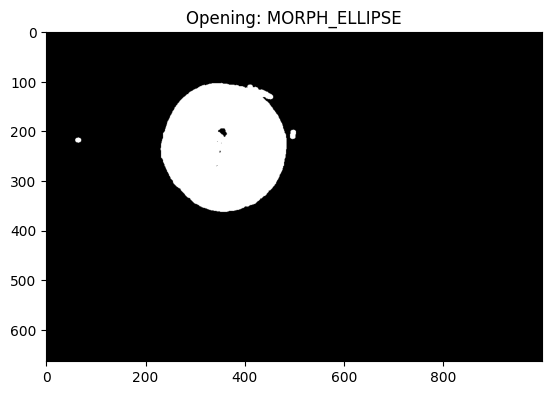

In [9]:
opening = cv2.morphologyEx(bin_mask*1., cv2.MORPH_OPEN, kernel)

plt.title(f"Opening: MORPH_ELLIPSE")
plt.imshow(opening, cmap='gray')
plt.show()

## Perímetro

Para encontrar el perímetro (es decir, los bordes) de un objeto debebos realizar una operación de erosión y restarle la imagen erosionada a la imagen original. Veremos cómo encontrar la 

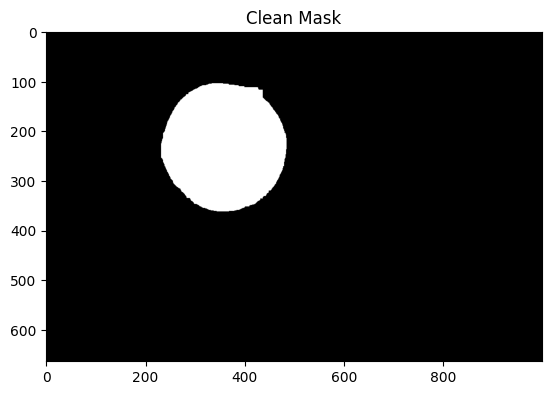

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
opening = cv2.morphologyEx(bin_mask*1., cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening*1., cv2.MORPH_CLOSE, kernel)
clean_mask = closing.copy()

plt.title(f"Clean Mask")
plt.imshow(clean_mask, cmap='gray')
plt.show()

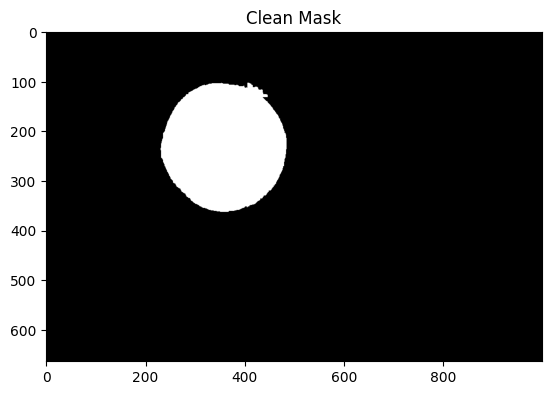

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (21, 21))
opening = cv2.morphologyEx(bin_mask*1., cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening*1., cv2.MORPH_CLOSE, kernel)
clean_mask = closing.copy()

plt.title(f"Clean Mask")
plt.imshow(clean_mask, cmap='gray')
plt.show()

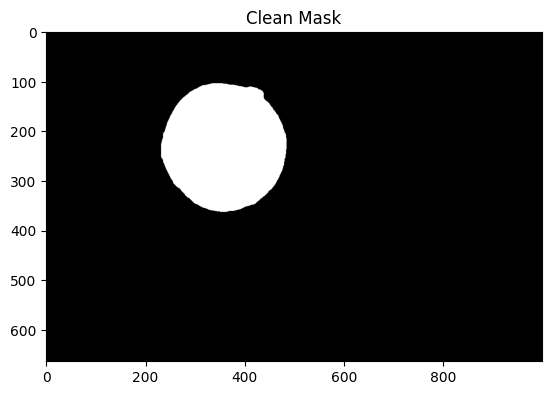

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))
opening = cv2.morphologyEx(bin_mask*1., cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening*1., cv2.MORPH_CLOSE, kernel)
clean_mask = closing.copy()

plt.title(f"Clean Mask")
plt.imshow(clean_mask, cmap='gray')
plt.show()

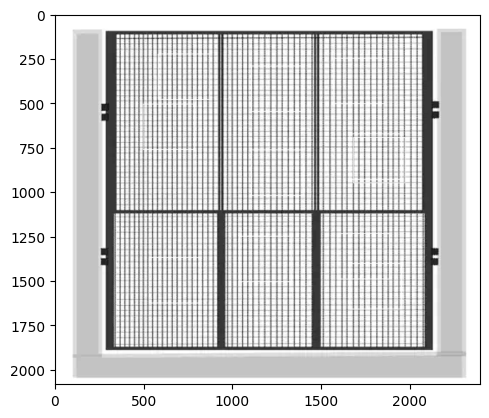

In [13]:
grid = cv2.imread('reja.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(grid, cmap='gray')

(array([   3979.,  106965.,  324973.,  215629.,  161823.,  147592.,
         149816.,  975056.,  587608., 2315344.]),
 array([115., 129., 143., 157., 171., 185., 199., 213., 227., 241., 255.]),
 <BarContainer object of 10 artists>)

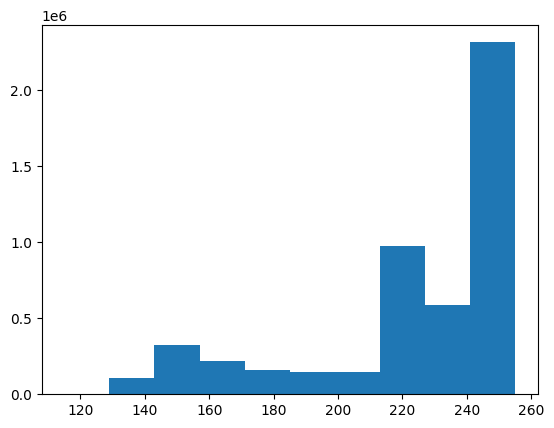

In [14]:
plt.hist(grid.ravel())

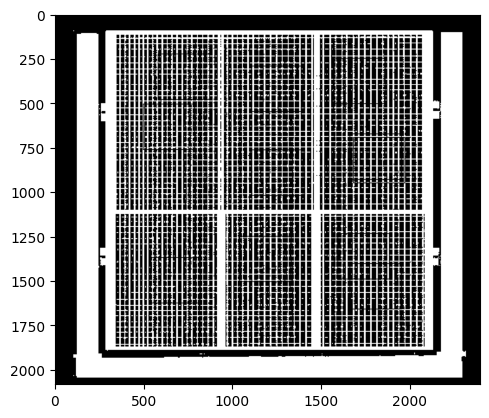

In [15]:
grid_bin = grid < 230
plt.imshow(grid_bin, cmap='gray')

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


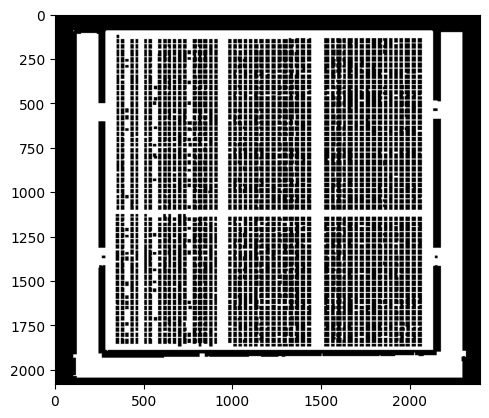

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
print(kernel)
closing = cv2.morphologyEx(grid_bin*1., cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


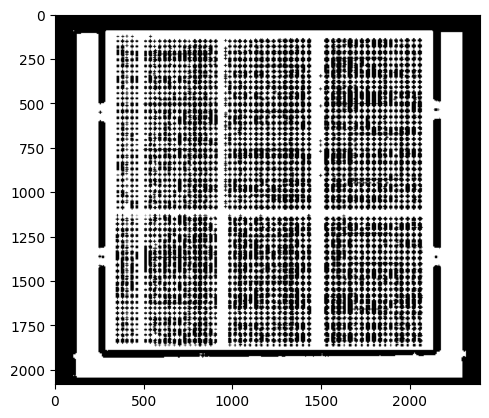

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (15, 15))
print(kernel)
closing = cv2.morphologyEx(grid_bin*1., cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 1 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


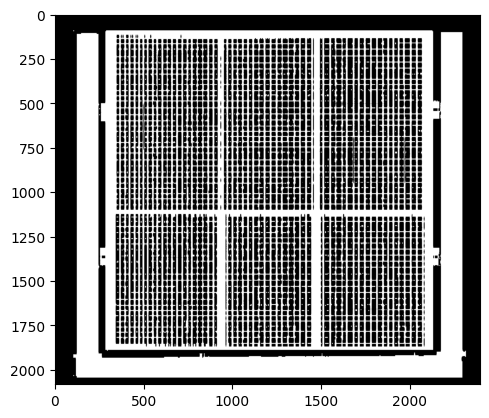

In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 15))
print(kernel)
closing = cv2.morphologyEx(grid_bin*1., cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


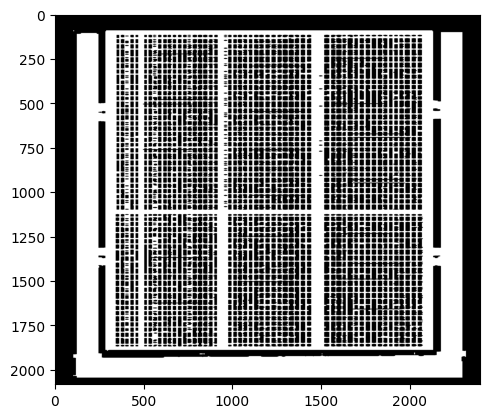

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (15, 3))
print(kernel)
closing = cv2.morphologyEx(grid_bin*1., cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')